In [1]:
import pandas as pd

dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.35. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Load Dataset - Time period is Monthly

In [23]:
datapath = '../Auto_TS/example_datasets/'
filename1 = 'Sales_and_Marketing.csv'
dataset = pd.read_csv(datapath+filename1, index_col=None)
dataset.head()

,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80
2,2011-03-01,498,437.09
3,2011-04-01,536,565.16
4,2011-05-01,596,744.15


<AxesSubplot:>

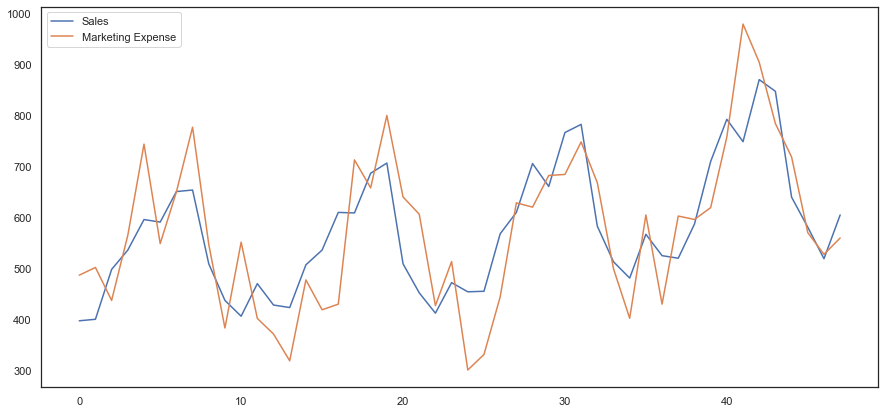

In [3]:
dataset[['Sales', 'Marketing Expense']].plot(figsize=(15,7))

# Train Auto_TS Model but don't provide Time Period as Monthly
We will see if Auto_TS can automatically infer the Time Period as Monthly

In [4]:
ts_column = 'Time Period'
target = 'Sales'
sep = ','

In [5]:
FORECAST_PERIOD = 3

In [6]:
train = dataset[:-FORECAST_PERIOD]
test = dataset[-FORECAST_PERIOD:]
print(train.shape, test.shape)

(45, 3) (3, 3)


In [7]:
model = auto_timeseries(
    score_type='rmse',
    model_type='best', verbose=2
)        

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |      -3.272157732365595      |
|           p-value           |     0.01616983190458116      |
|          #Lags Used         |             1.0              |
| Number of Observations Used |             43.0             |
|     Critical Value (1%)     |     -3.5925042342183704      |
|     Critical Value (5%)     |      -2.931549768951162      |
|     Critical Value (10%)    |      -2.60406594375338       |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = Sales
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_colu

    Root Mean Squared Error predictions vs actuals = 226.23
    Std Deviation of actuals = 82.02
    Normalized RMSE = 221%
Refitting data with previously found best parameters
    Best aic metric = 1042.0


Building ML Model



Running Machine Learning Models...
    Shifting 1 predictors by lag=4 to align prior predictor with current target...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    1 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

Fitting ML model
    19 variables used in training ML model = ['Marketing Expense(t)', 'Marketing Expense(t-4)', 'Sales(t-4)', 'Marketing Expense(t-3)', 'Sales(t-3)', 'Marketing Expense(t-2)', 'Sales(t-2)', 'Marketing Expense(t-1)', 'Sales(t-1)', 'Time Period_hour', 'Time Period_minute', 'Time Period_dayofweek', 'Time Period_quarter', 'Time Period_month', 'Time Period_year', 'Time Period_dayofyear', 'Time Period_da

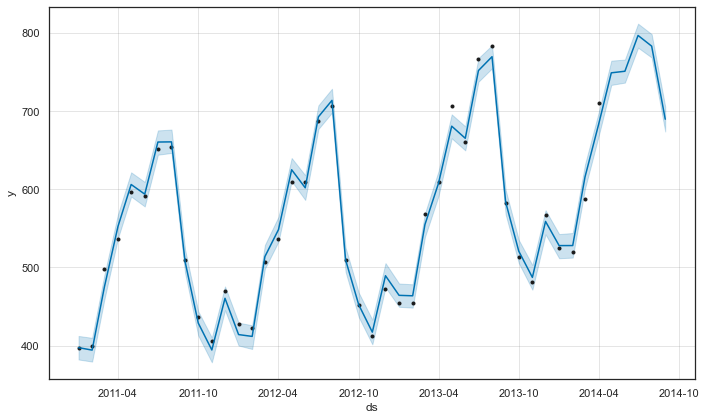

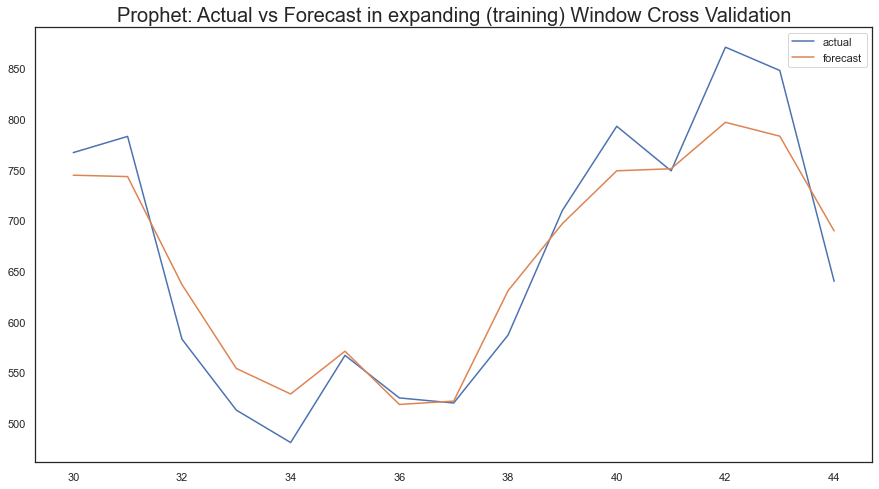

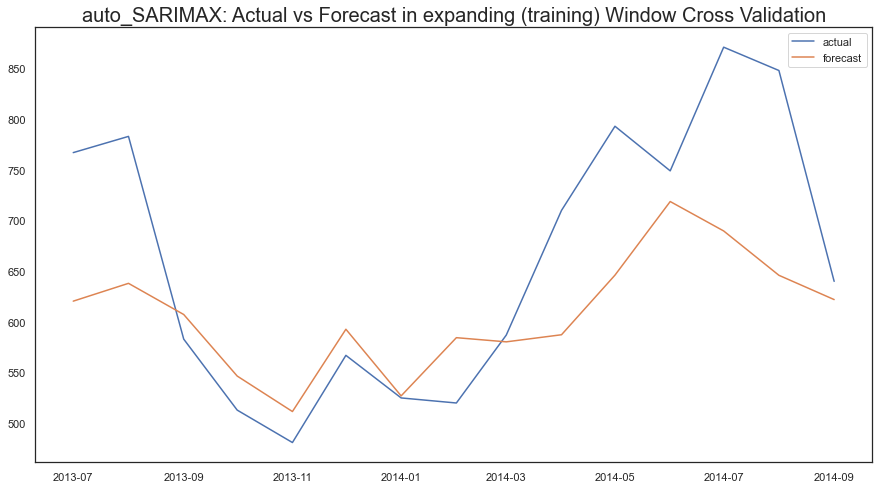

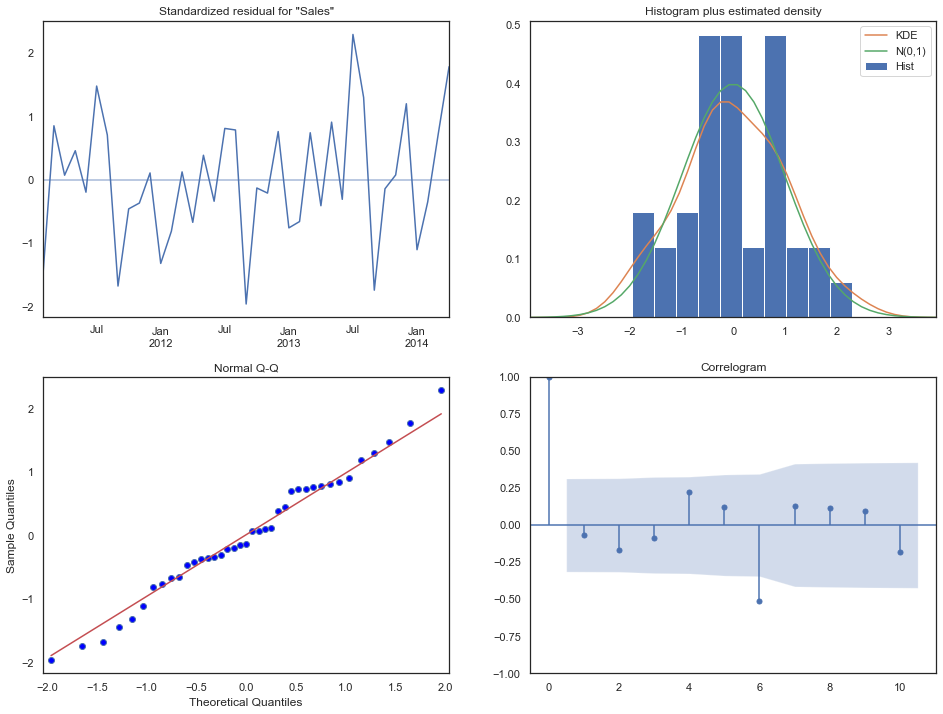

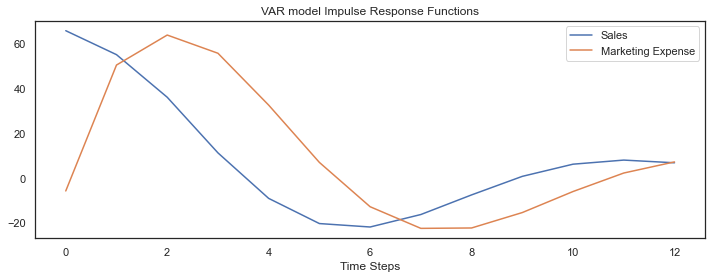

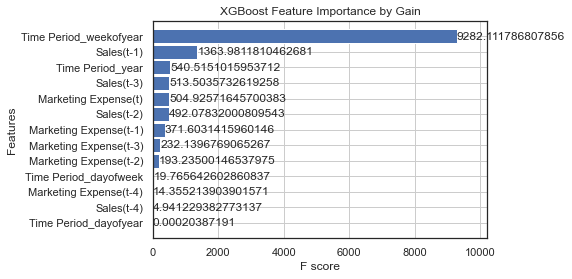

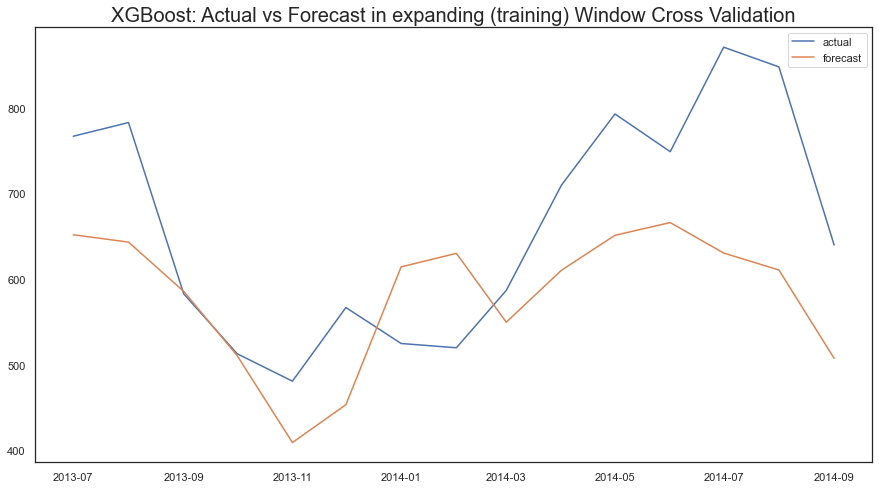

In [8]:
model.fit(
    traindata=train,
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

# Evaluate Results

In [9]:
model.get_leaderboard()

,name,rmse
0,Prophet,38.701333
1,auto_SARIMAX,99.011776
3,ML,119.730761
2,VAR,145.516547


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

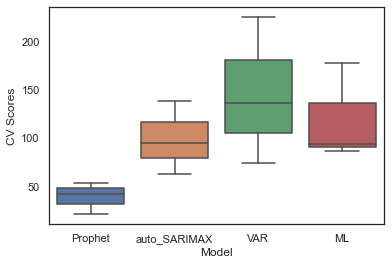

In [10]:
model.plot_cv_scores()

In [11]:
# make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,Prophet,42.295438
1,Prophet,20.714416
2,Prophet,53.094146
3,auto_SARIMAX,95.012327
4,auto_SARIMAX,63.108923
5,auto_SARIMAX,138.914078
6,VAR,136.370535
7,VAR,73.948309
8,VAR,226.230798
9,ML,87.027026


In [12]:
results_dict = model.get_ml_dict()

In [13]:
results_dict['Prophet']['forecast'] 

array([744.72467531, 743.3519548 , 636.8191262 , 554.07287676,
       528.88406206, 571.09593991, 518.56473237, 521.87459946,
       630.74665325, 696.96305378, 749.06129829, 751.07731594,
       796.89239642, 783.20675308, 689.69824041])

In [14]:
results_dict['auto_SARIMAX']['forecast']

[array([620.47397191, 638.03996568, 607.29052781, 546.5944208 ,
        511.57462747]),
 array([592.75432054, 527.015064  , 584.44045078, 580.32615036,
        587.32472274]),
 array([646.13502639, 718.74323314, 689.71800077, 645.97483963,
        622.01434425])]

In [15]:
results_dict['VAR']['forecast'] 

[array([607.65903797, 546.95535667, 488.37395542, 461.92515754,
        463.24416127]),
 array([480.2886552 , 507.26748431, 533.83879971, 559.43068197,
        573.77634922]),
 array([668.76084384, 616.28038203, 560.13518737, 520.13669249,
        503.17629775])]

In [16]:
results_dict['ML']['forecast'] # it now provides forecasts

[array([651.9308 , 643.42584, 585.83276, 510.8112 , 409.34924],
       dtype=float32),
 array([453.52548, 614.4614 , 630.268  , 549.9204 , 610.57196],
       dtype=float32),
 array([651.3446 , 666.19336, 630.6322 , 610.7881 , 507.64316],
       dtype=float32)]

# Forecast Results

In [17]:
# Actual Test
test.head()

,Time Period,Sales,Marketing Expense
45,2014-10-01,581,570.30
46,2014-11-01,519,527.60
47,2014-12-01,605,559.75


In [18]:
# Using Best Model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
)  
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Marketing Expense,Marketing Expense_lower,Marketing Expense_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,689.914384,582.558737,619.899522,689.861708,689.977262,-0.207675,-0.207675,-0.207675,-88.592296,...,-0.207675,-0.207675,-0.207675,-88.384621,-88.384621,-88.384621,0.0,0.0,0.0,601.322088
1,2014-11-01,696.096980,549.461755,586.070053,695.860380,696.363300,-1.472682,-1.472682,-1.472682,-128.710073,...,-1.472682,-1.472682,-1.472682,-127.237391,-127.237391,-127.237391,0.0,0.0,0.0,567.386906
2,2014-12-01,702.080136,623.128259,656.715028,701.619504,702.627254,-0.520223,-0.520223,-0.520223,-61.923930,...,-0.520223,-0.520223,-0.520223,-61.403706,-61.403706,-61.403706,0.0,0.0,0.0,640.156207


In [19]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='ML'
)
future_predictions

For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    ML predictions completed


,yhat,mean_se,mean_ci_lower,mean_ci_upper
Time Period,,,,
2014-10-01,488.862335,NaN,NaN,NaN
2014-11-01,422.914154,NaN,NaN,NaN
2014-12-01,432.040192,NaN,NaN,NaN


In [20]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='Prophet'
)
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Marketing Expense,Marketing Expense_lower,Marketing Expense_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,689.914384,583.358175,619.349968,689.855635,689.978870,-0.207675,-0.207675,-0.207675,-88.592296,...,-0.207675,-0.207675,-0.207675,-88.384621,-88.384621,-88.384621,0.0,0.0,0.0,601.322088
1,2014-11-01,696.096980,549.825602,585.136339,695.807011,696.378188,-1.472682,-1.472682,-1.472682,-128.710073,...,-1.472682,-1.472682,-1.472682,-127.237391,-127.237391,-127.237391,0.0,0.0,0.0,567.386906
2,2014-12-01,702.080136,623.294561,658.359677,701.511238,702.677580,-0.520223,-0.520223,-0.520223,-61.923930,...,-0.520223,-0.520223,-0.520223,-61.403706,-61.403706,-61.403706,0.0,0.0,0.0,640.156207


In [21]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='auto_SARIMAX'
)
future_predictions

Sales,yhat,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,614.597700,62.886966,491.341511,737.853888
2014-11-01,613.551709,68.730187,478.843018,748.260400
2014-12-01,633.870155,69.809714,497.045630,770.694679


In [22]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='VAR'
)
future_predictions

Sales,yhat,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,545.905049,69.326752,410.027112,681.782986
2014-11-01,494.892930,93.805621,311.037291,678.748569
2014-12-01,467.040893,107.508295,256.328508,677.753279
